### National Basketball Association

#### 2016 - 2017 season

In [92]:
import os,re
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns',200)
pd.set_option("display.max_rows",500)

In [93]:
dfNba = pd.read_csv("../../text_files/sbro/nba/nba_2016_sbro_massey_tr.txt")

In [94]:
dfNba.columns.tolist()

['date',
 'team1',
 'team1 encode',
 'team1 ha',
 'team1 ha encode',
 'team1 1st quarter',
 'team1 2nd quarter',
 'team1 3rd quarter',
 'team1 4th quarter',
 'team1 final score',
 'team1 game result',
 'team1 game result encode',
 'team1 open spread',
 'team1 open spread result',
 'team1 open spread result encode',
 'team1 close spread',
 'team1 close spread result',
 'team1 close spread result encode',
 'team1 american odds',
 'team1 probability odds',
 'team1 decimal odds',
 'team1 fractional odds',
 'team1 win',
 'team1 loss',
 'team1 record rating',
 'team1 rating rank',
 'team1 rating rating',
 'team1 power rank',
 'team1 power rating',
 'team1 offense rank',
 'team1 offense rating',
 'team1 defense rank',
 'team1 defense rating',
 'team1 home field advantage',
 'team1 schedule rank number',
 'team1 schedule rank decimal',
 'team1 conference',
 'team1 conference encode',
 'team1 assists',
 'team1 defensive rebounds',
 'team1 field goals attempted',
 'team1 fouls',
 'team1 offensiv

In [95]:
dfNba.head(50)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
0,1025,New York Knicks,20,away,0,18,27,19,24,88,loss,0,9.5,loss,0,9.0,loss,0,355,21.98,4.55,3.5500,31,51,0.378,25,-0.91,25,-4.41,19,103.70,22,-2.52,2.77,26,0.42,atlantic,1,21.8,33.2,88.5,20.3,12.0,108.0,104.3,99.7,114,104.9,103.8,-3.7,-8.3,1,-1.6,-5.8,24.7,Cleveland Cavaliers,6,home,1,28,20,34,35,117,win,1,-9.5,win,1,-9.0,win,1,-450,81.82,1.22,0.2222,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,central,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,205.5,under,0,206.0,under,0,2016
1,1025,Utah Jazz,29,away,0,26,20,37,21,104,loss,0,6.0,loss,0,5.5,loss,0,195,33.90,2.95,1.9500,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,Portland Trailblazers,25,home,1,26,28,23,36,113,win,1,-6.0,win,1,-5.5,win,1,-235,70.15,1.43,0.4255,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,northwest,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,194.0,over,1,192.0,over,1,2016
2,1025,San Antonio Spurs,27,away,0,31,33,33,32,129,win,1,8.0,win,1,8.0,win,1,325,23.53,4.25,3.2500,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,southwest,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,Golden State Warriors,10,home,1,20,26,31,23,100,loss,0,-8.0,loss,0,-8.0,loss,0,-400,80.00,1.25,0.2500,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,pacific,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,210.5,over,1,212.0,over,1,2016
3,1026,Miami Heat,16,away,0,23,27,30,28,108,win,1,4.0,win,1,3.0,w

### Parsing dates

In [96]:
def parseDate(df):
    for index,x in enumerate(df["date"]):
        if (int(x) > 900 and int(x) <= 1231 and len(str(x)) == 4):
            month = str(x)[:2]
            day = str(x)[2:]
            df["date"].iloc[index] = month + "/" + day + "/" + "2016"
            print("changed: %s" % df["date"].iloc[index])
        # following year from January to June
        elif (int(x) < 900):
            month = str(x)[:1]
            day = str(x)[1:]
            
            df["date"].iloc[index] = month + "/" + day + "/" + "2017"
            
    # return df

In [97]:
parseDate(dfNba).tail(50)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


changed: 10/25/2016
changed: 10/25/2016
changed: 10/25/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016


AttributeError: 'NoneType' object has no attribute 'tail'

In [98]:
dfNba.tail(50)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
1258,4/23/2017,Los Angeles Clippers,13,away,0,26,26,28,18,98,loss,0,1.0,loss,0,5.0,loss,0,185,35.09,2.85,1.8500,54,35,0.607,6,0.64,5,3.82,6,108.32,12,1.10,2.37,8,1.30,pacific,4,22.2,33.7,82.7,19.9,8.9,103.9,107.8,93.7,91,108.3,107.3,3.9,-4.0,-13,7.8,-0.2,27.1,Utah Jazz,29,home,1,24,31,22,28,105,win,1,-1.0,win,1,-5.0,win,1,-215,68.25,1.47,0.4651,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,198.0,over,1,196.0,over,1,2016
1259,4/24/2017,Milwaukee Bucks,17,away,0,20,28,25,20,93,loss,0,6.5,loss,0,6.0,loss,0,200,33.33,3.00,2.0000,44,44,0.500,16,-0.17,16,-0.70,28,100.77,5,4.12,2.73,21,0.53,central,2,24.0,31.5,81.6,20.3,8.8,103.1,102.9,86.0,89,104.9,100.9,-0.2,-13.0,-3,2.6,-3.1,23.6,Toronto Raptors,28,home,1,31,26,33,28,118,win,1,-6.5,win,1,-6.0,win,1,-240,70.59,1.42,0.4167,55,37,0.598,9,0.35,10,0.85,21,102.89,6,3.55,2.69,19,0.69,atlantic,1,18.6,32.6,83.8,20.8,10.2,102.6,105.8,99.7,102,109.8,101.7,3.1,-16.7,-7,6.6,-0.4,24.2,192.5,over,1,193.0,over,1,2016
1260,4/24/2017,Washington Wizards,30,away,0,35,15,27,24,101,loss,0,3.0,loss,0,2.5,loss,0,120,45.45,2.20,1.2000,56,39,0.589,8,0.47,12,0.68,5,109.45,25,-3.18,3.61,30,0.24,southeast,5,23.7,32.5,87.1,21.5,10.4,107.5,109.0,99.3,105,110.3,107.8,1.6,-10.3,-10,5.7,-2.5,25.0,Atlanta Hawks,1,home,1,28,31,18,34,111,win,1,-3.0,win,1,-2.5,win,1,-140,58.33,1.71,0.7143,45,43,0.511,17,-0.25,18,-1.07,22,102.65,10,1.87,3.19,29,0.31,southeast,5,23.5,34.0,84.4,18.4,10.4,104.2,103.3,103.0,99,106.1,100.5,-0.9,-3.3,-16,0.4,-2.1,26.1,211.5,over,1,213.0,under,0,2016
1261,4/24/2017,Golden State Warriors,10,away,0,45,2

### Change to date time index

In [99]:
dfNba["date"] = pd.to_datetime(dfNba["date"],format="%m/%d/%Y")
# dfNba["date"] = dfNba["date"].apply(pd.to_datetime(format="%m/%d/%Y"))
# dfNba.set_index("date",inplace=True)
# dfNba.dtypes
dfNba.head(15)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
0,2016-10-25,New York Knicks,20,away,0,18,27,19,24,88,loss,0,9.5,loss,0,9.0,loss,0,355,21.98,4.55,3.5500,31,51,0.378,25,-0.91,25,-4.41,19,103.70,22,-2.52,2.77,26,0.42,atlantic,1,21.8,33.2,88.5,20.3,12.0,108.0,104.3,99.7,114,104.9,103.8,-3.7,-8.3,1,-1.6,-5.8,24.7,Cleveland Cavaliers,6,home,1,28,20,34,35,117,win,1,-9.5,win,1,-9.0,win,1,-450,81.82,1.22,0.2222,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,central,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,205.5,under,0,206.0,under,0,2016
1,2016-10-25,Utah Jazz,29,away,0,26,20,37,21,104,loss,0,6.0,loss,0,5.5,loss,0,195,33.90,2.95,1.9500,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,Portland Trailblazers,25,home,1,26,28,23,36,113,win,1,-6.0,win,1,-5.5,win,1,-235,70.15,1.43,0.4255,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,northwest,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,194.0,over,1,192.0,over,1,2016
2,2016-10-25,San Antonio Spurs,27,away,0,31,33,33,32,129,win,1,8.0,win,1,8.0,win,1,325,23.53,4.25,3.2500,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,southwest,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,Golden State Warriors,10,home,1,20,26,31,23,100,loss,0,-8.0,loss,0,-8.0,loss,0,-400,80.00,1.25,0.2500,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,pacific,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,210.5,over,1,212.0,over,1,2016
3,2016-10-26,Miami Heat,16,away,0,23,27,30,28,1

### Restrict target

In [100]:
dfFilterNba = dfNba[(dfNba["team1 final score"] > 60) & (dfNba["team2 final score"] > 60)]

In [101]:
# dallasDf["Date"] = pd.to_datetime(dallasDf['Date'])
# dallasDf.set_index('Date',inplace=True)
# dallasDf.index

In [102]:
features = [
    # 'date',
    # 'team1',
    # 'team1 ha',
    # 'team1 1st quarter',
    # 'team1 2nd quarter',
    # 'team1 3rd quarter',
    # 'team1 4th quarter',
    # 'team1 final score',
    # 'team1 game result',
    # 'team1 game result encode',
    # 'team1 open spread result',
    # 'team1 open spread result encode',
    'team1 close spread',
    # 'team1 close spread result',
    # 'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 loss',
    'team1 power rank',
    'team1 power rating',
    'team1 offense rank',
    'team1 home field advantage',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    # 'team1 conference',
    'team1 assists',
    'team1 defensive rebounds',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 home points',
    'team1 scoring margin',
    'team1 last 1 scoring margin',
    # 'team2',
    'team2 encode',
    # 'team2 ha',
    # 'team2 1st quarter',
    # 'team2 2nd quarter',
    # 'team2 3rd quarter',
    # 'team2 4th quarter',
    # 'team2 final score',
    # 'team2 game result',
    # 'team2 game result encode',
    # 'team2 open spread result',
    # 'team2 open spread result encode',
    'team2 close spread',
    # 'team2 close spread result',
    # 'team2 close spread result encode',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    # 'team2 conference',
    'team2 conference encode',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 1 scoring margin',
    'team2 away scoring margin',
    'open total',
    'close total']

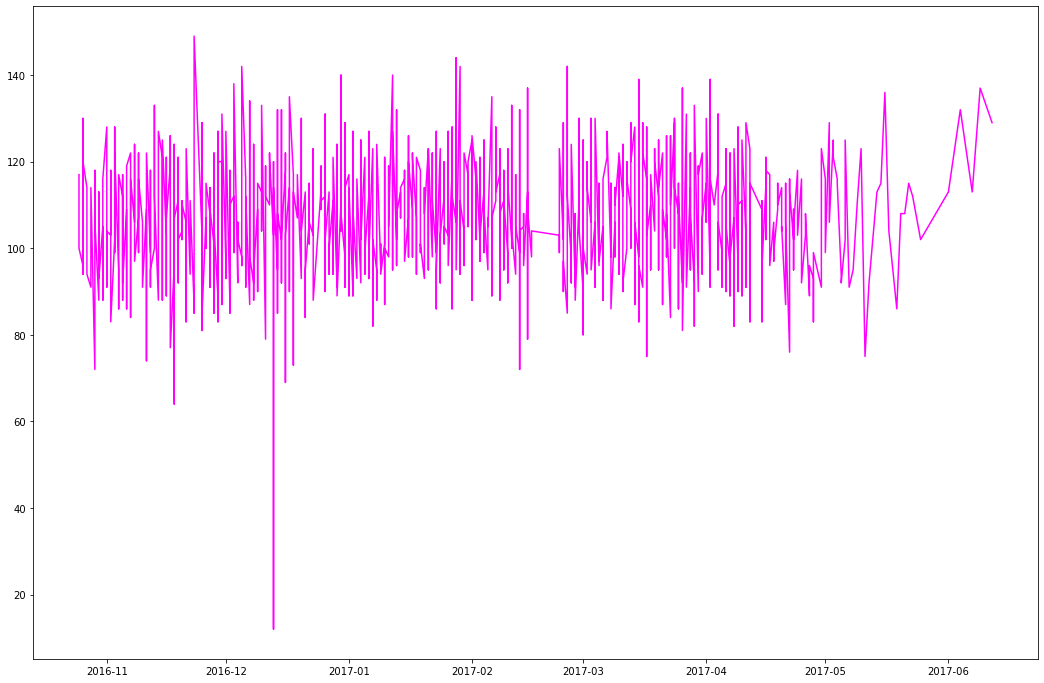

In [103]:
plt.figure(figsize=(18,12))
# plt.plot(nbaDf.index,nbaDf["team1 final score"],color="green")
plt.plot(dfNba.date,dfNba["team2 final score"],color="magenta")
plt.show()

In [104]:
dfNbaScore = dfNba[(dfNba["team1 final score"] > 60) \
    & (dfNba["team2 final score"] > 60)]

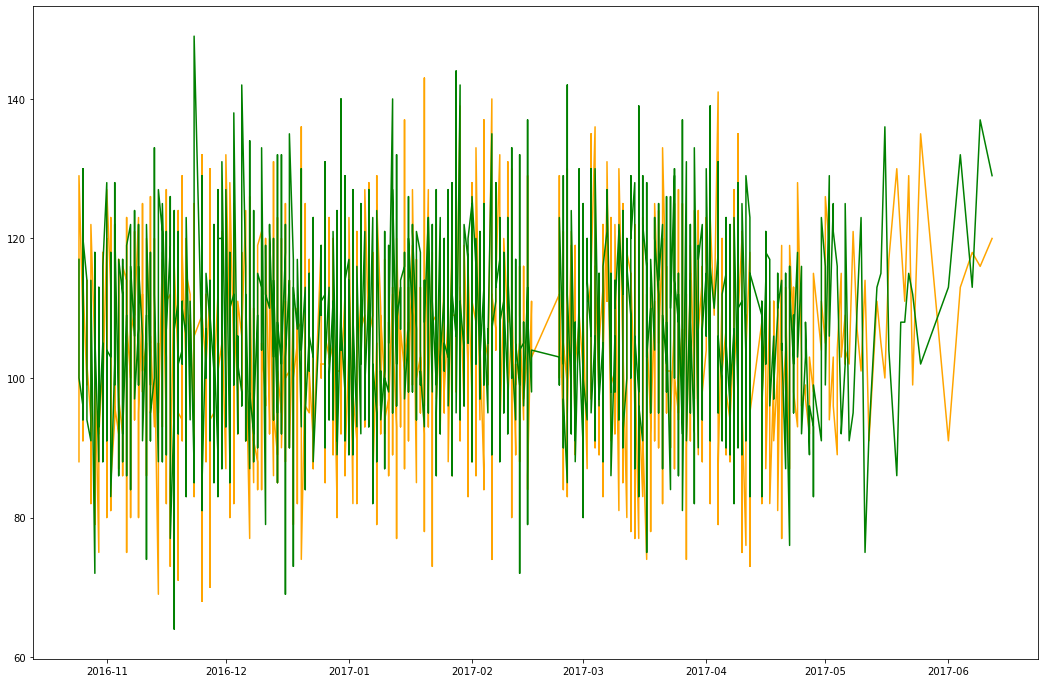

In [105]:
plt.figure(figsize=(18,12))
plt.plot(dfNbaScore.date,dfNbaScore["team1 final score"],color="orange")
plt.plot(dfNbaScore.date,dfNbaScore["team2 final score"],color="green")
plt.show()

### Train, test, & split

#### Target team one final score

In [107]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[features],dfFilterNba["team1 final score"], \
    test_size=0.25,random_state=14)

xTestCopy = xTest.copy(deep=True)

In [108]:
# scale data
scalerX = StandardScaler()
scalerX.fit(xTrain)
xTrainScaled = scalerX.transform(xTrain)
xTestScaled = scalerX.transform(xTest)

In [109]:
XGBRegressor = xgb.XGBRegressor(booster="gbtree",objective="reg:squarederror",learning_rate=0.9111,
    max_depth=6,alpha=1,n_estimators=211,reg_lambda=0.09999,reg_alpha=2.2222)

In [110]:
XGBRegressor.fit(xTrainScaled,yTrain)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.9111, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=211, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=2.2222, reg_lambda=0.09999, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [111]:
yPredict = XGBRegressor.predict(xTestScaled)
pd.DataFrame(yPredict).head(255)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


,0
0,121.269714
1,90.469215
2,103.083694
3,100.101891
4,95.994347
5,112.903519
6,106.856407
7,89.490486
8,116.958534
9,109.356834


In [112]:
xTestCopy.reset_index(inplace=True)
xTestCopy.head(25)

,index,team1 close spread,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 loss,team1 power rank,team1 power rating,team1 offense rank,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 assists,team1 defensive rebounds,team1 offensive rebounds,team1 opponent points,team1 points,team1 home points,team1 scoring margin,team1 last 1 scoring margin,team2 encode,team2 close spread,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference encode,team2 defensive rebounds,team2 field goals attempted,team2 opponent points,team2 points,team2 last 3 points,team2 away points,team2 scoring margin,team2 last 1 scoring margin,team2 away scoring margin,open total,close total
0,876,2.0,110,47.62,2.10,1.1000,43,15,-0.11,26,3.08,6,1.47,21.1,31.7,10.6,100.3,100.2,99.5,-0.1,-7,8,-2.0,56.52,1.77,0.7692,40,42,11,0.15,9,1.39,112.65,2.81,16,0.84,3,34.6,87.7,111.2,111.7,108.3,110.3,0.5,6,-1.4,215.0,216.5
1,603,11.5,550,15.38,6.50,5.5000,53,29,-6.01,24,2.79,27,0.37,22.2,33.3,9.8,107.6,101.1,100.2,-6.6,4,29,-11.5,88.89,1.12,0.1250,55,38,5,0.78,6,3.74,100.01,2.24,1,1.90,3,33.7,79.3,97.5,100.4,96.7,100.0,2.9,-26,1.1,194.0,194.5
2,446,4.5,165,37.74,2.65,1.6500,41,8,1.53,18,2.85,25,0.42,21.2,33.0,10.6,102.1,103.2,106.5,1.1,8,19,-4.5,64.91,1.54,0.5405,34,48,19,-0.36,20,-1.52,104.77,2.95,12,0.96,6,35.1,87.0,106.4,104.3,100.0,101.0,-2.1,3,-4.8,203.0,206.0
3,726,9.5,425,19.05,5.25,4.2500,39,13,0.32,14,3.19,9,1.27,20.9,34.2,12.2,106.2,106.5,109.7,0.2,-6,27,-9.5,84.62,1.18,0.1818,69,29,3,1.23,3,6.50,106.69,2.85,2,1.74,6,33.5,84.2,99.4,105.6,107.7,105.0,6.2,-14,4.9,210.0,210.0
4,551,6.0,220,31.25,3.20,2.2000,48,20,-1.52,16,2.95,12,0.96,22.8,35.1,8.6,106.4,104.3,107.6,-2.1,3,2,-6.0,72.22,1.38,0.3846,62,38,7,0.61,7,1.89,106.81,2.33,15,0.88,1,32.1,84.9,105.9,107.5,104.0,105.6,1.6,-33,0.8,214.5,212.5
5,280,0.0,-110,52.38,1.91,0.9091,53,29,-6.01,24,2.79,27,0.37,22.2,33.3,9.8,107.6,101.1,100.2,-6.6,4,23,0.0,52.38,1.91,0.9091,28,54,27,-1.05,27,-5.85,103.33,2.71,28,0.36,1,33.0,85.3,108.1,102.4,102.0,102.5,-5.7,-1,-7.8,196.0,198.5
6,168,5.0,175,36.36,2.75,1.7500,51,25,-4.41,19,2.77,26,0.42,21.8,33.2,12.0,108.0,104.3,104.9,-3.7,1,30,-5.0,66.67,1.50,0.5000,56,39,8,0.47,12,0.68,109.45,3.61,30,0.24,5,32.5,87.1,107.5,109.0,99.3,107.8,1.6,-10,-2.5,205.5,208.5
7,1219,14.5,1100,8.33,12.00,11.0000,43,18,-1.07,22,3.19,29,0.31,23.5,34.0,10.4,104.2,103.3,106.1,-0.9,-16,12,-14.5,96.15,1.04,0.0400,42,44,18,-0.34,11,0.83,105.79,3.01,20,0.59,2,32.8,84.7,105.7,105.3,109.0,103.6,-0.4,-4,-5.6,207.0,200.5
8,1176,5.0,180,35.71,2.80,1.8000,51,19,-1.34,12,3.02,11,1.05,23.7,31.0,11.4,106.7,105.6,106.6,-1.1,-5,25,-5.0,67.74,1.48,0.4762,41,45,14,-0.07,14,0.19,106.97,3.03,4,1.55,3,33.6,86.2,109.0,107.6,99.0,105.4,-1.3,-25,-4.9,219.5,217.0
9,273,7.5,250,28.57,3.50,2.5000,44,11,0.83,13,3.01,20,0.59,22.5,32.8,9.2,105.7,105.3,107.0,-0.4,-4,25,-7.5,75.90,1.32,0.3175,41,45,14,-0.07,14,0.19,106.97,3.03,4,1.55,3,33.6,86.2,109.0,107.6,99.0,105.4,-1.3,-25,-4.9,215.0,209.0


In [113]:
xTestCopy["team1 final score predict"] = ""
for index,row in enumerate(range(0,len(xTestCopy),1)):
    # print(index)
    xTestCopy["team1 final score predict"].iloc[index] = pd.DataFrame(yPredict).iloc[index,0]
    


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [114]:
xTestCopy.tail(50)

,index,team1 close spread,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 loss,team1 power rank,team1 power rating,team1 offense rank,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 assists,team1 defensive rebounds,team1 offensive rebounds,team1 opponent points,team1 points,team1 home points,team1 scoring margin,team1 last 1 scoring margin,team2 encode,team2 close spread,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference encode,team2 defensive rebounds,team2 field goals attempted,team2 opponent points,team2 points,team2 last 3 points,team2 away points,team2 scoring margin,team2 last 1 scoring margin,team2 away scoring margin,open total,close total,team1 final score predict
277,625,5.5,200,33.33,3.00,2.0000,45,14,0.19,8,3.03,4,1.55,20.9,33.6,10.1,109.0,107.6,109.8,-1.3,-25,4,-5.5,70.59,1.42,0.4167,36,46,21,-0.45,17,-1.06,104.34,2.87,22,0.48,5,34.8,85.4,104.7,104.9,89.7,103.2,0.2,-27,-2.8,216.5,217.5,96.51564
278,1193,17.0,1600,5.88,17.00,16.0000,48,20,-1.52,16,2.95,12,0.96,22.8,35.1,8.6,106.4,104.3,107.6,-2.1,3,10,-17.0,98.36,1.02,0.0167,83,16,1,3.54,1,15.71,119.68,2.99,3,1.58,4,35.3,87.1,104.5,116.5,121.0,114.0,12.0,9,7.7,219.0,216.0,99.254425
279,80,-12.0,-1000,90.91,1.10,0.1000,36,2,8.45,2,2.71,5,1.52,22.6,34.1,9.3,107.4,111.4,113.4,4.0,-9,23,12.0,12.50,8.00,7.0000,28,54,27,-1.05,27,-5.85,103.33,2.71,28,0.36,1,33.0,85.3,108.1,102.4,102.0,102.5,-5.7,-1,-7.8,204.5,210.0,99.297997
280,35,-11.5,-791,88.78,1.13,0.1264,16,1,15.71,1,2.99,3,1.58,30.0,35.3,9.4,104.5,116.5,118.9,12.0,9,24,11.5,14.93,6.70,5.7000,24,58,29,-1.34,28,-6.01,107.98,2.98,13,0.96,4,33.1,88.5,113.3,107.7,116.0,105.8,-5.6,-25,-8.7,225.0,227.0,115.353401
281,176,9.5,400,20.00,5.00,4.0000,62,30,-6.55,11,2.66,23,0.43,21.4,35.1,8.8,112.5,105.8,104.4,-6.7,-39,21,-9.5,83.33,1.20,0.2000,48,39,12,0.11,13,0.32,105.48,3.19,9,1.27,3,34.2,87.4,106.2,106.5,107.7,103.3,0.2,-6,-5.1,218.0,216.5,105.077293
282,29,8.0,280,26.32,3.80,2.8000,62,30,-6.55,11,2.66,23,0.43,21.4,35.1,8.8,112.5,105.8,104.4,-6.7,-39,17,-8.0,78.26,1.28,0.2778,44,44,16,-0.17,16,-0.70,100.77,2.73,21,0.53,2,31.5,81.6,103.1,102.9,86.0,100.9,-0.2,-3,-3.1,206.0,205.0,91.783569
283,1284,-6.5,-285,74.03,1.35,0.3509,36,2,8.45,2,2.71,5,1.52,22.6,34.1,9.3,107.4,111.4,113.4,4.0,-9,28,6.5,29.94,3.34,2.3400,55,37,9,0.35,10,0.85,102.89,2.69,19,0.69,1,32.6,83.8,102.6,105.8,99.7,101.7,3.1,-7,-0.4,209.0,209.0,112.387764
284,1226,7.0,250,28.57,3.50,2.5000,48,20,-1.52,16,2.95,12,0.96,22.8,35.1,8.6,106.4,104.3,107.6,-2.1,3,25,-7.0,75.00,1.33,0.3333,41,45,14,-0.07,14,0.19,106.97,3.03,4,1.55,3,33.6,86.2,109.0,107.6,99.0,105.4,-1.3,-25,-4.9,211.0,202.0,102.974442
285,137,4.5,170,37.04,2.70,1.7000,62,30,-6.55,11,2.66,23,0.43,21.4,35.1,8.8,112.5,105.8,104.4,-6.7,-39,24,-4.5,66.67,1.50,0.5000,24,58,29,-1.34,28,-6.01,107.98,2.98,13,0.96,4,33.1,88.5,113.3,107.7,116.0,105.8,-5.6,-25,-8.7,217.5,218.5,122.420212
286,1266,7.5,299,25.06,3.99,2.9900,45,21,-1.64,27,1.97,18,0.73,22.4,34.1,12.2,102.5,102.4,102.7,-0.1,-22,2,-7.5,78.95,1.27,0.2667,62,38,7,0.61,7,1.89,106.81,2.33,15,0.88,1,32.1,84.9,105.9,107.5,104.0,105.6,1.6,-33,0.8,202.0,205.0,123.112961


In [115]:
dfPredict = pd.DataFrame(columns=["yTest","yPredict"])

In [116]:
dfPredict["yTest"] = yTest
dfPredict["yPredict"] = yPredict
dfPredict.head(100)

,yTest,yPredict
876,105,121.269714
603,107,90.469215
446,87,103.083694
726,94,100.101891
551,108,95.994347
280,105,112.903519
168,112,106.856407
1219,86,89.490486
1176,98,116.958534
273,109,109.356834


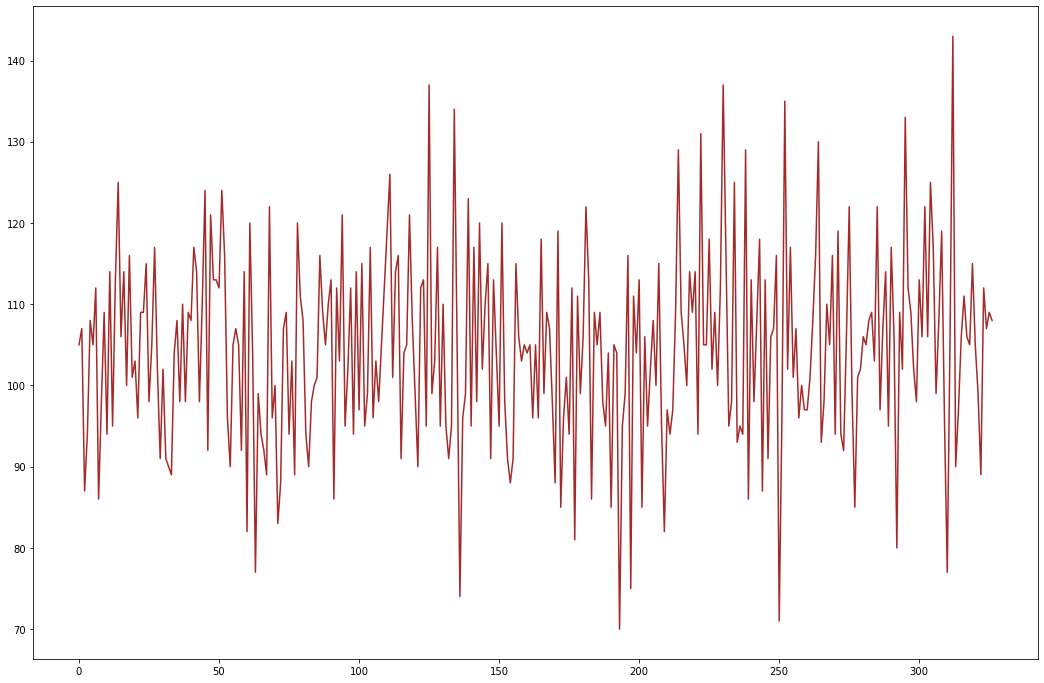

In [117]:
yTestReset = pd.DataFrame(yTest).reset_index(inplace=False,drop=True)

plt.figure(figsize=(18,12))
plt.plot(yTestReset.index,yTestReset,color="brown")
plt.show()

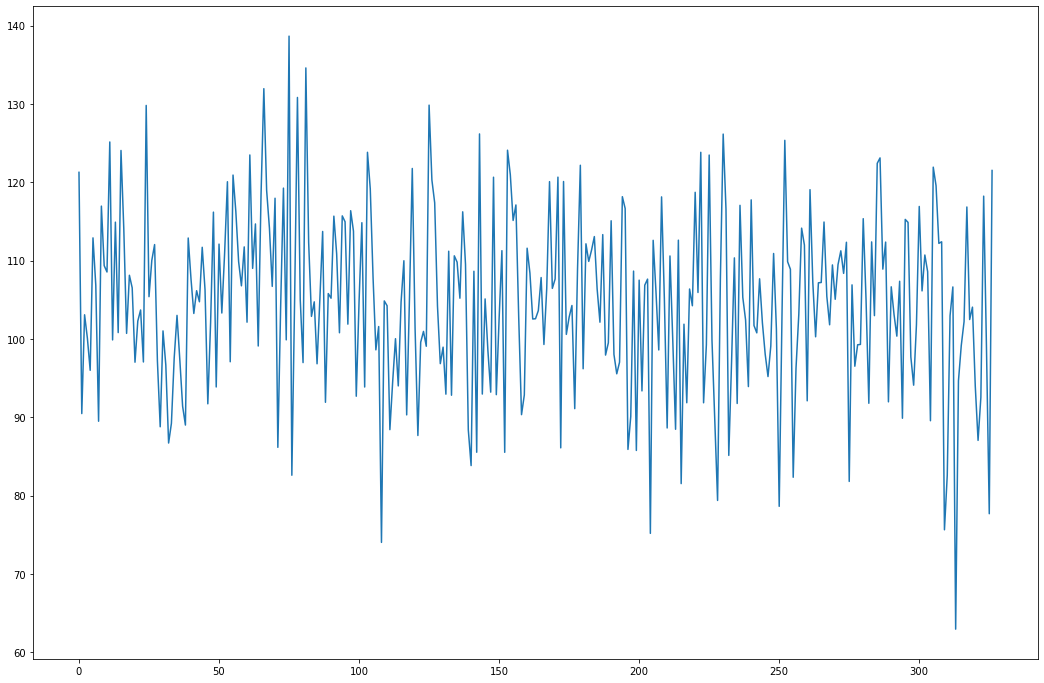

In [118]:
yPredictReset = pd.DataFrame(yPredict).reset_index(inplace=False,drop=True)

plt.figure(figsize=(18,12))
plt.plot(yPredictReset.index,yPredictReset[0])
plt.show()

### Superimpose

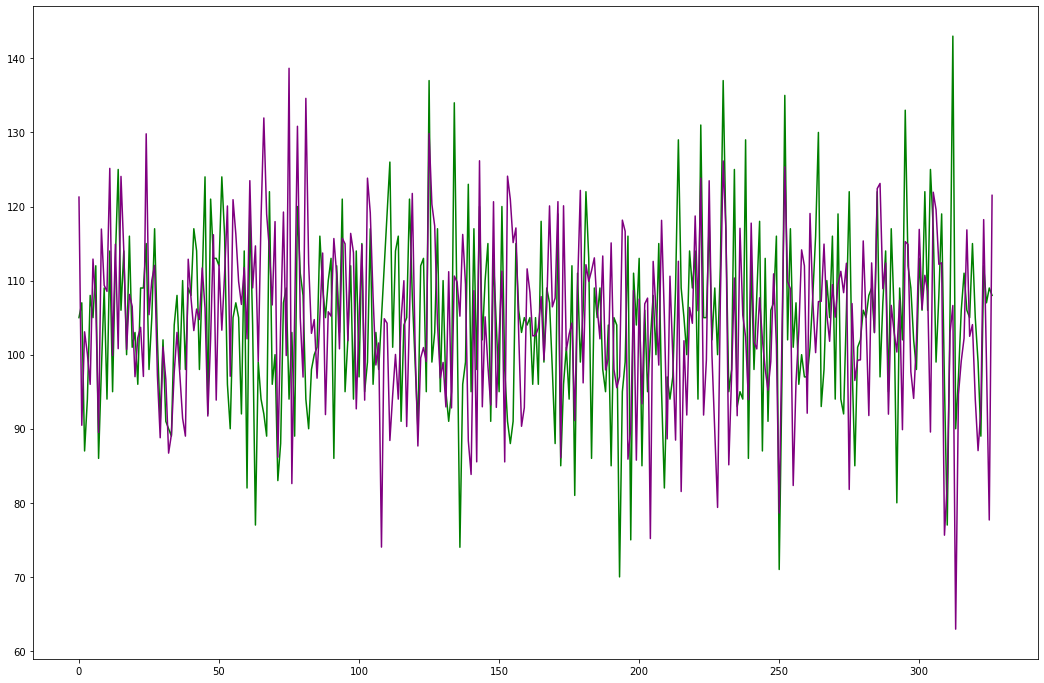

In [119]:
plt.figure(figsize=(18,12))
plt.plot(yTestReset.index,yTestReset["team1 final score"],color="green")
plt.plot(yPredictReset.index,yPredictReset[0],color="purple")
plt.show()

### Percentage off

In [120]:
convNumpyYTestReset = np.array(yTestReset)
percentOff = ((convNumpyYTestReset - yPredictReset) / (convNumpyYTestReset + 0.0001)) * 100

pd.DataFrame(percentOff).sample(55)

,0
28,4.705410
307,-3.887653
182,2.743528
198,2.107120
225,-4.640834
296,-2.569605
107,-3.654188
194,-24.380789
166,-0.295041
195,-17.834963


In [121]:
meanAbsoluteError = mean_absolute_error(yTest,yPredict)
print("mean absolute error (team1 final score): %s" % meanAbsoluteError)
meanSquaredError = mean_squared_error(yTest,yPredict)
print("mean squared error (team1 final score): %s" % meanSquaredError)

mean absolute error (team1 final score): 10.923491230069315
mean squared error (team1 final score): 199.30363070556064


### Convert to dmatrix data structure

In [122]:
dataDMatrix = xgb.DMatrix(data=dfFilterNba[features],label=dfFilterNba["team1 final score"])
dataDMatrix

In [123]:
params = {"booster": "gbtree","objective":"reg:squarederror","learning_rate": 0.9111,
    'max_depth': 6,"alpha": 1,"n_estimators": 211,"reg_lambda": 0.09999,"reg_alpha": 2.2222}

In [124]:
crossValResults = xgb.cv(dtrain=dataDMatrix,params=params,nfold=12,
    num_boost_round=25,early_stopping_rounds=10,metrics="rmse",as_pandas=True,seed=122)
crossValResults.head()

[11:25:09] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:25:09] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:25:09] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,14.222633,0.073460,14.684197,0.504785
1,9.715424,0.148064,12.055630,0.727231


In [125]:
dtrain = xgb.DMatrix(xTrain[features],label=yTrain)
dtest = xgb.DMatrix(xTest[features],label=yTest)

In [126]:
parameter = {'max_depth': 6,'eta': 0.3333,"booster": "gbtree","verbose": True,"n_estimators": 122,"learning_rate": 0.9111,
    "objective": "reg:squarederror","alpha": 10,"reg_alpha":2.2222}
parameter["nthread"] = 4
parameter['eval_metric'] = ["auc","logloss","ams@0"]

evallist = [(dtest,"eval"),(dtrain,"train")]

In [127]:
num_round = 17
bst = xgb.train(parameter,dtrain,num_round,evallist)

[11:25:13] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:25:13] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[11:25:13] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[0]	eval-auc:nan	eval-logloss:-3807.39185	eval-ams@0:30.76110	train-auc:nan	train-logloss:-3794.32080	train-ams@0:61.56797
[11:25:13] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[11:25:13] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[1]	eval-auc:nan	eval-logloss:-3807.39185	eval-ams@0:41.17907	train-auc:nan	train-logloss:-3794.32080	train-ams@0:84.43428
[11:25:13] WARNIN

In [128]:
yPredict1 = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)
pd.DataFrame(yPredict1).head(50)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


,0
0,119.648949
1,95.991478
2,100.366928
3,91.823502
4,112.840057
5,102.916733
6,100.360641
7,79.623001
8,94.603058
9,97.089073


### Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

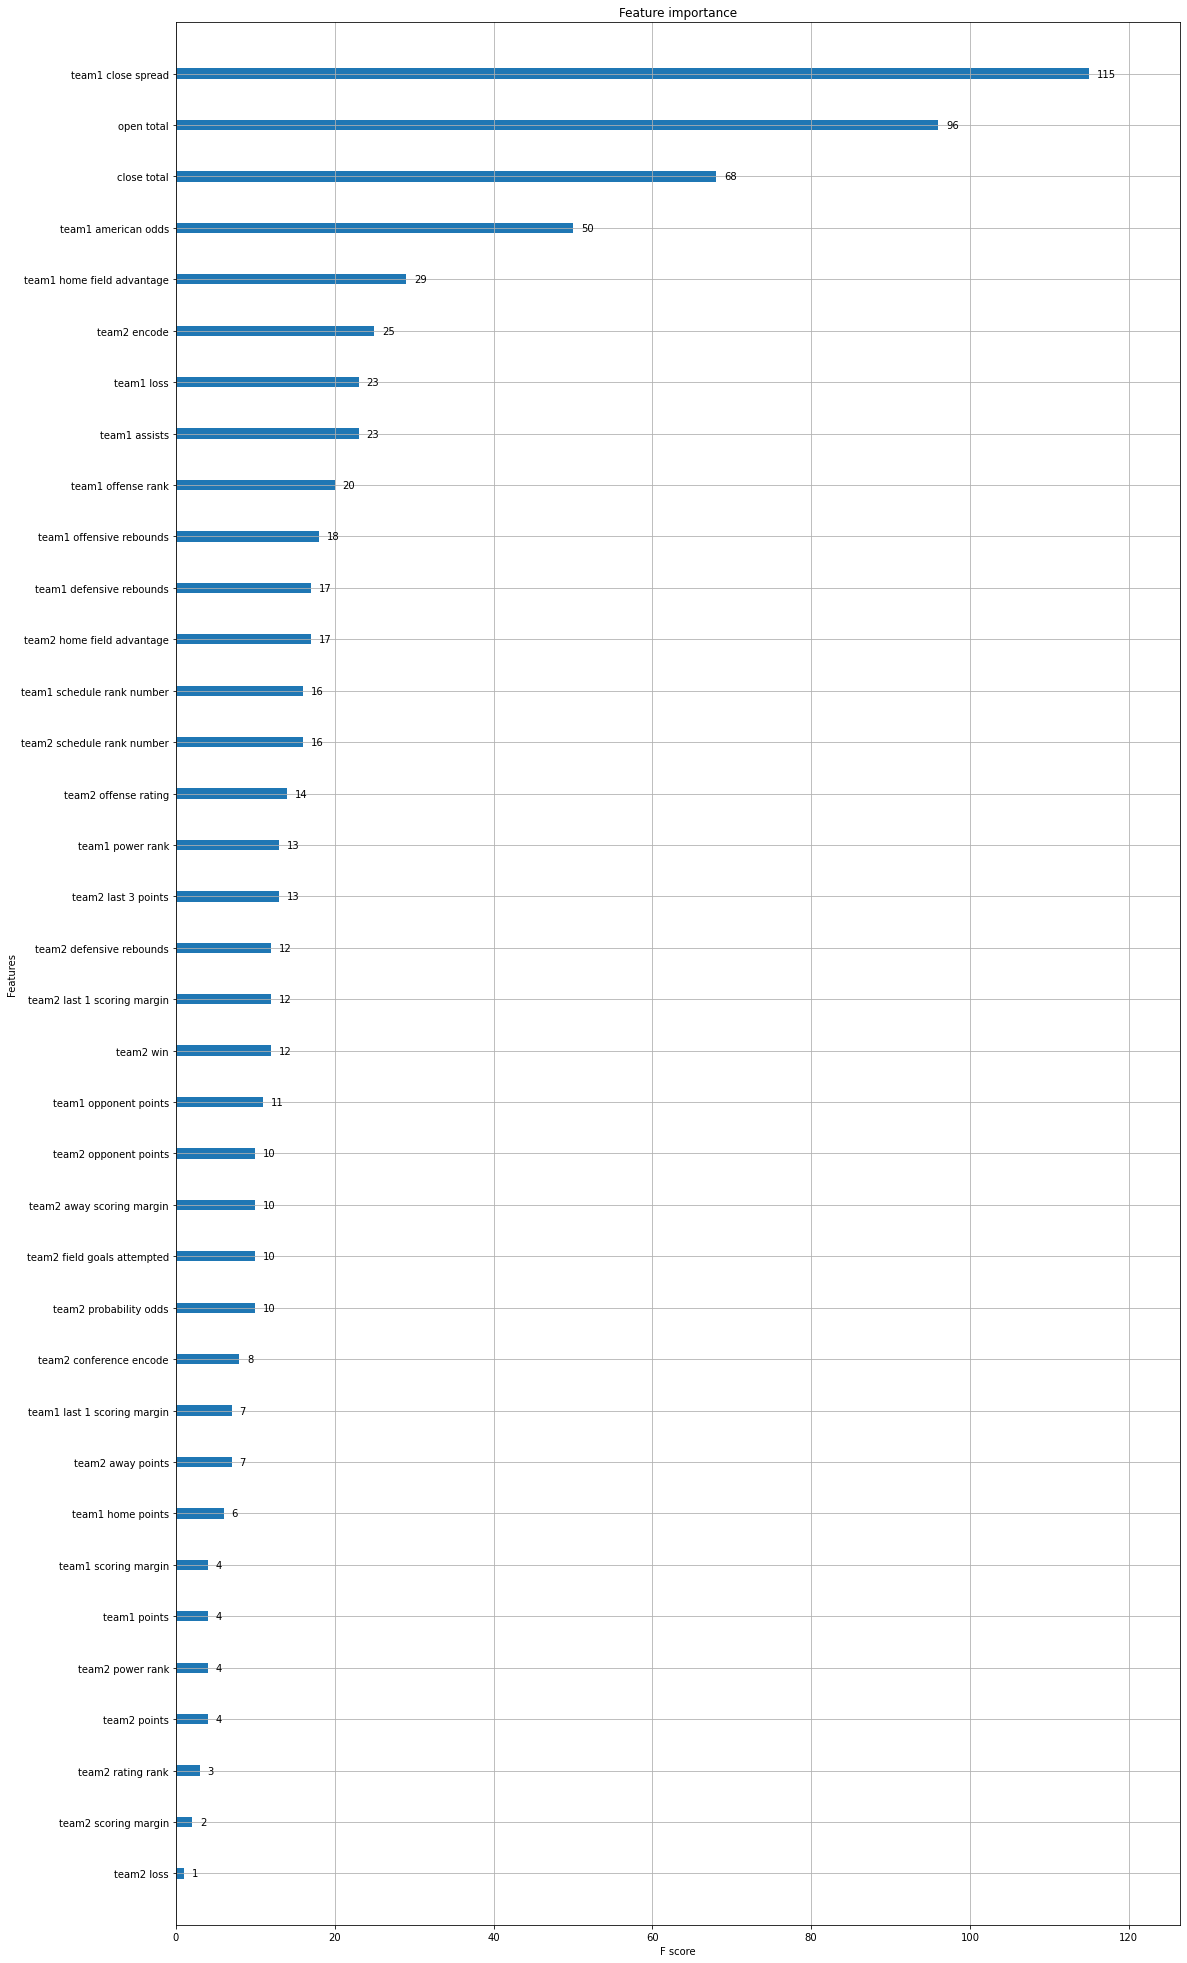

In [129]:
fig,ax = plt.subplots(1,1,figsize=(18,35))
xgb.plot_importance(bst,ax=ax)

### SHAP (shapley additive explanations)

In [130]:
treeExplainer = shap.TreeExplainer(XGBRegressor,model_output="raw",feature_perturbation="interventional",
    data=pd.DataFrame(xTest).head(100),algorithm="deep")

In [131]:
shapValues = treeExplainer.shap_values(pd.DataFrame(xTest).iloc[:327,:])
shapValues

array([[ 1.00244935e+01,  2.84999787e-01,  0.00000000e+00, ...,
        -2.26681427e-01,  0.00000000e+00, -1.56955723e-01],
       [ 1.15824903e+01,  1.25554863e-02,  0.00000000e+00, ...,
         4.93654372e-01,  0.00000000e+00, -1.56597833e-01],
       [ 9.44822991e+00,  6.66529309e-01,  0.00000000e+00, ...,
        -2.26681427e-01,  0.00000000e+00, -1.56955723e-01],
       ...,
       [ 1.04939943e+01, -5.61244048e-01,  0.00000000e+00, ...,
        -2.26681427e-01,  0.00000000e+00, -1.56597833e-01],
       [-2.53922922e+01,  5.34452386e-01,  0.00000000e+00, ...,
         1.50027746e-02,  0.00000000e+00, -1.99179543e-01],
       [ 1.05855406e+01, -4.14654646e-01,  0.00000000e+00, ...,
        -2.26681427e-01,  0.00000000e+00, -1.56597833e-01]])

In [132]:
shapValuesList = []
for i in shapValues:
    convListShapValues = i.tolist()
    shapValuesList.append(convListShapValues)
    
dfShapValues = pd.DataFrame(shapValuesList)
dfShapValues.head(55)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,10.024493,0.285000,0.0,0.0,0.0,0.0,0.010514,0.0,0.263335,0.0,-0.006291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.801462,0.628909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.119067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.802680,0.565114,-0.226681,0.0,-0.156956
1,11.582490,0.012555,0.0,0.0,0.0,0.0,0.010514,0.0,0.263335,0.0,-0.018874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.447776,-2.098995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.411199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.849710,-0.237405,0.493654,0.0,-0.156598
2,9.448230,0.666529,0.0,0.0,0.0,0.0,0.010514,0.0,0.263335,0.0,-0.006291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.802448,-2.286100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.119067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.226318,0.436667,-0.226681,0.0,-0.156956
3,10.666342,-0.422183,0.0,0.0,0.0,0.0,0.010514,0.0,0.263335,0.0,-0.018874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.853949,0.591553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.119067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.802680,-0.146870,0.493654,0.0,-0.156598
4,11.510532,-0.274288,0.0,0.0,0.0,0.0,0.010514,0.0,0.263335,0.0,-0.018874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.447776,-2.098995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.119067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.849710,-0.237405,0.493654,0.0,-0.156598
5,-2.206678,8.574634,0.0,0.0,0.0,0.0,0.008174,0.0,-0.095024,0.0,-0.010112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.090387,-2.949252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000089,0.0,0.0,0.0,-0.096290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.524901,3.672132,0.015003,0.0,-0.177666
6,11.346789,-0.414655,0.0,0.0,0.0,0.0,0.010514,0.0,0.263335,0.0,-0.018874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.447776,-2.098995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.119067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.849710,-0.237405,-0.226681,0.0,-0.156598
7,9.732746,-0.561244,0.0,0.0,0.0,0.0,0.010514,0.0,0.263335,0.0,-0.018874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929833,0.592243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.119067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.632848,-0.145950,-0.226681,0.0,-0.156598
8,9.732746,-0.561244,0.0,0.0,0.0,0.0,0.010514,0.0,0.263335,0.0,-0.018874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929833,0.592243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.119067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.632848,-0.145950,-0.226681,0.0,-0.156598
9,9.732746,-0.561244,0.0,0.0,0.0,0.0,0.010514,0.0,0.263335,0.0,-0.018874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929833,0.592243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.119067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.632848,-0.145950,-0.226681,0.0,-0.156598


In [133]:
shap.initjs()

In [134]:
shap.force_plot(treeExplainer.expected_value,shapValues[4],pd.DataFrame(xTest).iloc[5:6,])


In [135]:
shap.force_plot(treeExplainer.expected_value,shapValues[27],pd.DataFrame(xTest).iloc[28:29,])


In [136]:
shap.force_plot(treeExplainer.expected_value,shapValues[55],pd.DataFrame(xTest).iloc[56:57])


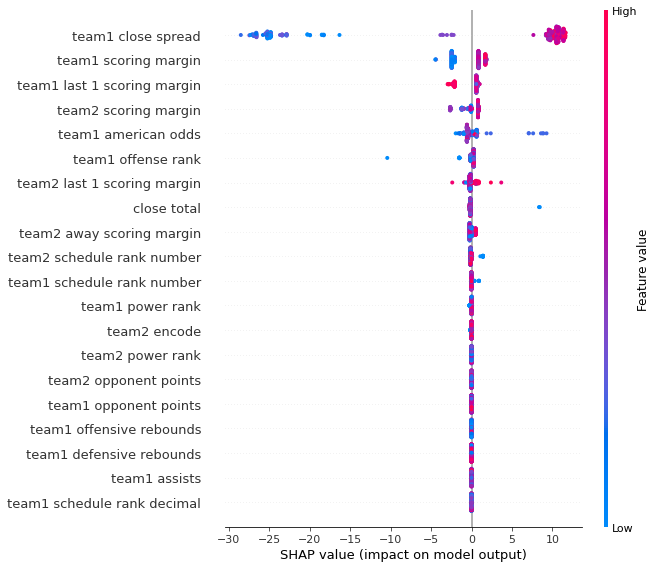

In [137]:
shap.summary_plot(shapValues,xTest[0:327])

### Compute SHAP values

In [138]:
explainer = shap.Explainer(XGBRegressor.predict,xTrain[:100])
explainShapValues = explainer(xTrain[:50])

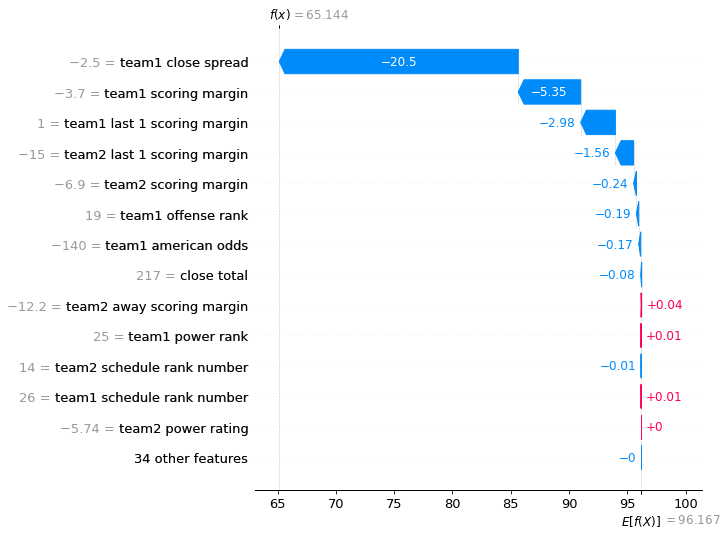

In [139]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(explainShapValues[13],max_display=14)

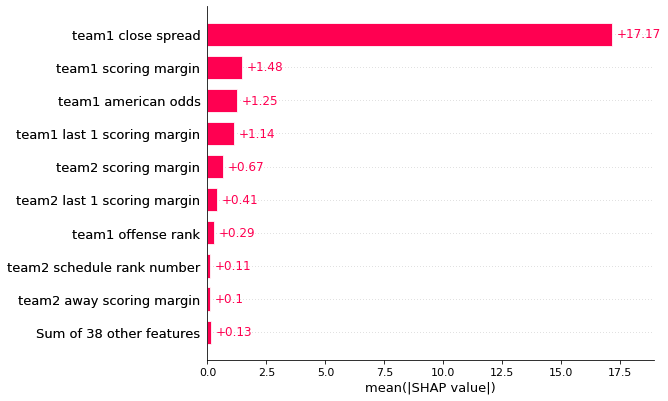

In [140]:
shap.plots.bar(explainShapValues)

### Statsmodels

In [145]:
feat = [
    # 'date',
    # 'team1',
    'team1 encode',
    # 'team1 ha',
    'team1 ha encode',
    # 'team1 1st quarter',
    # 'team1 2nd quarter',
    # 'team1 3rd quarter',
    # 'team1 4th quarter',
    # 'team1 final score',
    # 'team1 game result',
    # 'team1 game result encode',
    'team1 open spread',
    # 'team1 open spread result',
    # 'team1 open spread result encode',
    'team1 close spread',
    # 'team1 close spread result',
    # 'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 win',
    'team1 loss',
    'team1 record rating',
    'team1 rating rank',
    'team1 rating rating',
    'team1 power rank',
    'team1 power rating',
    'team1 offense rank',
    'team1 offense rating',
    'team1 defense rank',
    'team1 defense rating',
    'team1 home field advantage',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    # 'team1 conference',
    'team1 conference encode',
    'team1 assists',
    'team1 defensive rebounds',
    'team1 field goals attempted',
    'team1 fouls',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 last 3 points',
    'team1 last 1 points',
    'team1 home points',
    'team1 away points',
    'team1 scoring margin',
    'team1 last 3 scoring margin',
    'team1 last 1 scoring margin',
    'team1 home scoring margin',
    'team1 away scoring margin',
    'team1 three pointers attempted',
    # 'team2',
    'team2 encode',
    # 'team2 ha',
    'team2 ha encode',
    # 'team2 1st quarter',
    # 'team2 2nd quarter',
    # 'team2 3rd quarter',
    # 'team2 4th quarter',
    # 'team2 final score',
    # 'team2 game result',
    # 'team2 game result encode',
    'team2 open spread',
    # 'team2 open spread result',
    # 'team2 open spread result encode',
    'team2 close spread',
    # 'team2 close spread result',
    # 'team2 close spread result encode',
    'team2 american odds',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 record rating',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rank',
    'team2 offense rating',
    'team2 defense rank',
    'team2 defense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    # 'team2 conference',
    'team2 conference encode',
    'team2 assists',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 fouls',
    'team2 offensive rebounds',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 last 1 points',
    'team2 home points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 3 scoring margin',
    'team2 last 1 scoring margin',
    'team2 home scoring margin',
    'team2 away scoring margin',
    'team2 three pointers attempted',
    'open total',
    # 'open total result',
    # 'open total result encode',
    'close total']
    # 'close total result',
    # 'close total result encode',
    # 'year'

dropFeat = [
    # 'date',
    # 'team1',
    # 'team1 ha',
    # 'team1 1st quarter',
    # 'team1 2nd quarter',
    # 'team1 3rd quarter',
    # 'team1 4th quarter',
    # 'team1 final score',
    # 'team1 game result',
    # 'team1 game result encode',
    # 'team1 open spread result',
    # 'team1 open spread result encode',
    'team1 close spread',
    # 'team1 close spread result',
    # 'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 loss',
    'team1 power rank',
    'team1 power rating',
    'team1 offense rank',
    'team1 home field advantage',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    # 'team1 conference',
    'team1 assists',
    'team1 defensive rebounds',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 home points',
    'team1 scoring margin',
    'team1 last 1 scoring margin',
    # 'team2',
    'team2 encode',
    # 'team2 ha',
    # 'team2 1st quarter',
    # 'team2 2nd quarter',
    # 'team2 3rd quarter',
    # 'team2 4th quarter',
    # 'team2 final score',
    # 'team2 game result',
    # 'team2 game result encode',
    # 'team2 open spread result',
    # 'team2 open spread result encode',
    'team2 close spread',
    # 'team2 close spread result',
    # 'team2 close spread result encode',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    # 'team2 conference',
    'team2 conference encode',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 1 scoring margin',
    'team2 away scoring margin',
    'open total',
    'close total']


In [146]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[feat],dfFilterNba["team1 final score"],test_size=0.25,\
    random_state=11)

In [147]:
xInclCons = sm.add_constant(xTrain)
# ordinary least squares
model = sm.OLS(yTrain.astype(float),xInclCons.astype(float))          
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      team1 final score   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     4.667
Date:                Tue, 18 May 2021   Prob (F-statistic):           1.95e-28
Time:                        11:25:39   Log-Likelihood:                -3696.1
No. Observations:                 980   AIC:                             7534.
Df Residuals:                     909   BIC:                             7881.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
team1 encode                      -0.0231      0.181     -0.127      0.899      -0.378       0.332
team1 ha encode                -1.238e-09   1.34e-09     -0.923      0.356   -3.87e-09    1.39e-09
team1 open spread                 -0.0157      0.129     -0.122      0.903      -0.268       0.237
team1 close spread                -0.1096      0.134     -0.819      0.413      -0.372       0.153
team1 american odds               -0.0061      0.007     -0.850      0.396      -0.020       0.008
team1 probability odds             0.5934      0.704      0.843      0.399      -0.788       1.974
team1 decimal odds              -258.5241    204.979     -1.261      0.208    -660.812     143.764
team1 fractional odds            259.5266    205.036      1.266      0.206    -142.872     661.925
team1 win                          0.2511      0.565      0.445      0.657      -0.857       1.359
team1 loss                         1.1292      1.525      0.741      0.459      -1.863       4.122
team1 record rating               -4.8740      6.749     -0.722      0.470     -18.119       8.371
team1 rating rank                 -0.0096      0.789     -0.012      0.990      -1.558       1.539
team1 rating rating               -1.1603     14.063     -0.083      0.934     -28.761      26.440
team1 power rank                  -0.4673      1.123     -0.416      0.677      -2.672       1.737
team1 power rating                -0.9258      2.682     -0.345      0.730      -6.189       4.337
team1 offense rank                 0.3264      0.394      0.829      0.407      -0.446       1.099
team1 offense rating              -0.9384      4.299     -0.218      0.827      -9.376       7.499
team1 defense rank                -0.2679      0.707     -0.379      0.705      -1.655       1.119
team1 defense rating              -0.6388      3.054     -0.209      0.834      -6.633       5.355
team1 home field advantage        -3.0715      3.628     -0.847      0.397     -10.191       4.048
team1 schedule rank number         1.0440      1.235      0.845      0.398      -1.380       3.468
team1 schedule rank decimal       21.3631     26.163      0.817      0.414     -29.984      72.710
team1 conference encode            0.5510      1.059      0.520      0.603      -1.528       2.630
team1 assists                      0.7569      1.014      0.747      0.456      -1.233       2.747
team1 defensive rebounds           1.1298      2.108      0.536      0.592      -3.008       5.267
team1 field goals attempted        0.1513      0.647      0.234      0.815      -1.118       1.421
team1 fouls                        0.0605      0.702      0.086      0.931      -1.318       1.439
team1 offensive rebounds          -0.5674      1.059     -0.536      0.592      -2.646       1.512
team1 opponent

In [148]:
pValues = pd.DataFrame({'coefficient': results.params,'p_value': round(results.pvalues,4)})
pValues

,coefficient,p_value
team1 encode,-2.305159e-02,0.8986
team1 ha encode,-1.237943e-09,0.3560
team1 open spread,-1.566596e-02,0.9031
team1 close spread,-1.096191e-01,0.4131
team1 american odds,-6.110944e-03,0.3958
team1 probability odds,5.933646e-01,0.3993
team1 decimal odds,-2.585241e+02,0.2076
team1 fractional odds,2.595266e+02,0.2059
team1 win,2.510591e-01,0.6566
team1 loss,1.129232e+00,0.4592


In [149]:
pValueSeries = pValues.p_value
pd.DataFrame(pValueSeries).head(70)

,p_value
team1 encode,0.8986
team1 ha encode,0.3560
team1 open spread,0.9031
team1 close spread,0.4131
team1 american odds,0.3958
team1 probability odds,0.3993
team1 decimal odds,0.2076
team1 fractional odds,0.2059
team1 win,0.6566
team1 loss,0.4592


### Features improvement

In [150]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[dropFeat],dfFilterNba["team1 final score"],test_size=0.25,\
    random_state=11)

In [151]:
xInclCons = sm.add_constant(xTrain)
model = sm.OLS(yTrain.astype(float),xInclCons.astype(float))   # ordinary least square
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      team1 final score   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     7.226
Date:                Tue, 18 May 2021   Prob (F-statistic):           2.80e-37
Time:                        11:25:41   Log-Likelihood:                -3697.2
No. Observations:                 980   AIC:                             7488.
Df Residuals:                     933   BIC:                             7718.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          99.5243    294.813      0.338      0.736    -479.050     678.098
team1 close spread             -0.1267      0.039     -3.250      0.001      -0.203      -0.050
team1 american odds            -0.0066      0.007     -0.954      0.340      -0.020       0.007
team1 probability odds          0.5466      0.684      0.799      0.425      -0.796       1.890
team1 decimal odds           -258.8408    199.560     -1.297      0.195    -650.479     132.797
team1 fractional odds         259.7144    199.613      1.301      0.194    -132.028     651.457
team1 loss                      0.3201      0.244      1.313      0.190      -0.158       0.799
team1 power rank               -0.1122      0.156     -0.717      0.473      -0.419       0.195
team1 power rating             -0.2268      0.509     -0.446      0.656      -1.226       0.772
team1 offense rank              0.0893      0.139      0.643      0.520      -0.183       0.362
team1 home field advantage     -0.6753      1.606     -0.421      0.674      -3.827       2.476
team1 schedule rank number      0.2293      0.360      0.638      0.524      -0.476       0.935
team1 schedule rank decimal     4.7534      7.195      0.661      0.509      -9.368      18.874
team1 assists                   0.1289      0.305      0.423      0.672      -0.469       0.727
team1 defensive rebounds        0.3011      0.375      0.803      0.422      -0.435       1.037
team1 offensive rebounds       -0.2009      0.372     -0.541      0.589      -0.930       0.528
team1 opponent points           7.2971      9.283      0.786      0.432     -10.920      25.514
team1 points                   -5.3556      9.179     -0.583      0.560     -23.369      12.658
team1 home points              -1.1713      0.416     -2.813      0.005      -1.989      -0.354
team1 scoring margin            7.9194      9.220      0.859      0.391     -10.174      26.013
team1 last 1 scoring margin     0.0555      0.041      1.358      0.175      -0.025       0.136
team2 encode                    0.0728      0.070      1.045      0.296      -0.064       0.210
team2 close spread              0.1267      0.039      3.250      0.001       0.050       0.203
team2 probability odds          0.4823      0.687      0.702      0.483      -0.866       1.831
team2 decimal odds            113.1760    149.339      0.758      0.449    -179.904     406.256
team2 fractional odds        -115.0598    149.334     -0.770      0.441    -408.129     178.009
team2 win                      -0.3144      0.353     -0.890      0.374      -1.008       0.379
team2 loss                     -0.7606      0.650     -1.170      0.242      -2.036       0.515
team2 rating rank              -0.6156      0.608     -1.012      0.312      -1.809       0.578
team2 ratin

In [152]:
pValues = pd.DataFrame({'coef': results.params,'pvalue': round(results.pvalues,4)})
pValues

,coef,pvalue
const,99.524316,0.7358
team1 close spread,-0.126744,0.0012
team1 american odds,-0.006638,0.3401
team1 probability odds,0.546631,0.4246
team1 decimal odds,-258.840750,0.1949
team1 fractional odds,259.714363,0.1935
team1 loss,0.320090,0.1895
team1 power rank,-0.112200,0.4733
team1 power rating,-0.226816,0.6560
team1 offense rank,0.089318,0.5204
